<a id=section1></a>

<a id=section2></a>

### Importing packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")

In [70]:
df.shape

(16468, 14)

In [71]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


- The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, we'll remove it in pre-processing

In [7]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


we dont have any missing values

In [72]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [73]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

### * Preprocessing

- The Feature __"Unnamed:0"__ is just a representation of the indexes, so it's useless to keep it, lets remove it now !

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

- Lets check our data head again to make sure that the Feature __Unnamed:0 is removed__

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


- Earlier in __info__ we have seen that __Date__ is __Object__ type not the date type. We have to change its type to date type.

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [6]:
df['AveragePrice'].fillna(df['AveragePrice'].mean(), inplace=True)
df['Total Volume'].fillna(df['Total Volume'].mean(), inplace=True)
df['4046'].fillna(df['4046'].mean(), inplace=True)
df['4225'].fillna(df['4225'].mean(), inplace=True)
df['4770'].fillna(df['4770'].mean(), inplace=True)
df['Total Bags'].fillna(df['Total Bags'].mean(), inplace=True)
df['Small Bags'].fillna(df['Small Bags'].mean(), inplace=True)
df['Large Bags'].fillna(df['Large Bags'].mean(), inplace=True)
df['XLarge Bags'].fillna(df['XLarge Bags'].mean(), inplace=True)
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33000,6.423662e+04,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015.0,Albany,12.0,27.0
1,2015-12-20,1.35000,5.487698e+04,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015.0,Albany,12.0,20.0
2,2015-12-13,0.93000,1.182202e+05,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015.0,Albany,12.0,13.0
3,2015-06-12,1.08000,7.899215e+04,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015.0,Albany,6.0,12.0
4,2015-11-29,1.28000,5.103960e+04,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015.0,Albany,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,2015-12-04,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,conventional,2015.0,California,5.0,22.0
16464,2015-12-04,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,conventional,2015.0,California,5.0,22.0
16465,2015-12-04,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,conventional,2015.0,California,5.0,22.0
16466,2015-12-04,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,conventional,2015.0,California,5.0,22.0


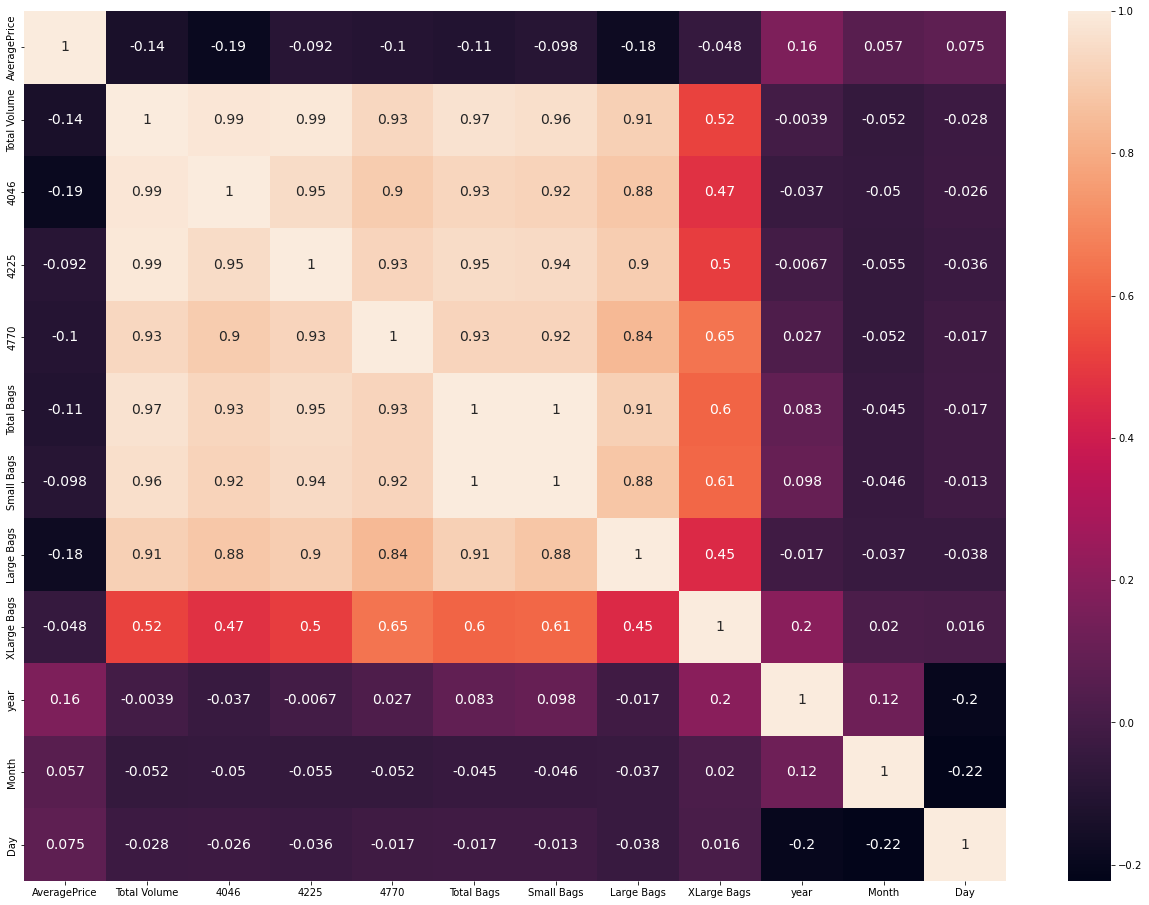

In [7]:
# Feature selection process
# visualize relationship between features and label using heatmap
df_corr = df.corr()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':14})
plt.show()

As we can from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them are correlated with each other

In [80]:
df['region'].nunique()

51

In [81]:
df['type'].nunique()

1

- As we can see we have 51 regions and 1 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

- I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [8]:
df=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [9]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33000,6.423662e+04,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,2015.0,12.0,27.0
1,1.35000,5.487698e+04,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,2015.0,12.0,20.0
2,0.93000,1.182202e+05,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,2015.0,12.0,13.0
3,1.08000,7.899215e+04,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,2015.0,6.0,12.0
4,1.28000,5.103960e+04,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,2015.0,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16463,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.0,5.0,22.0
16464,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.0,5.0,22.0
16465,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.0,5.0,22.0
16466,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.0,5.0,22.0


In [10]:
df.shape

(16468, 12)

### * Data Visualisation

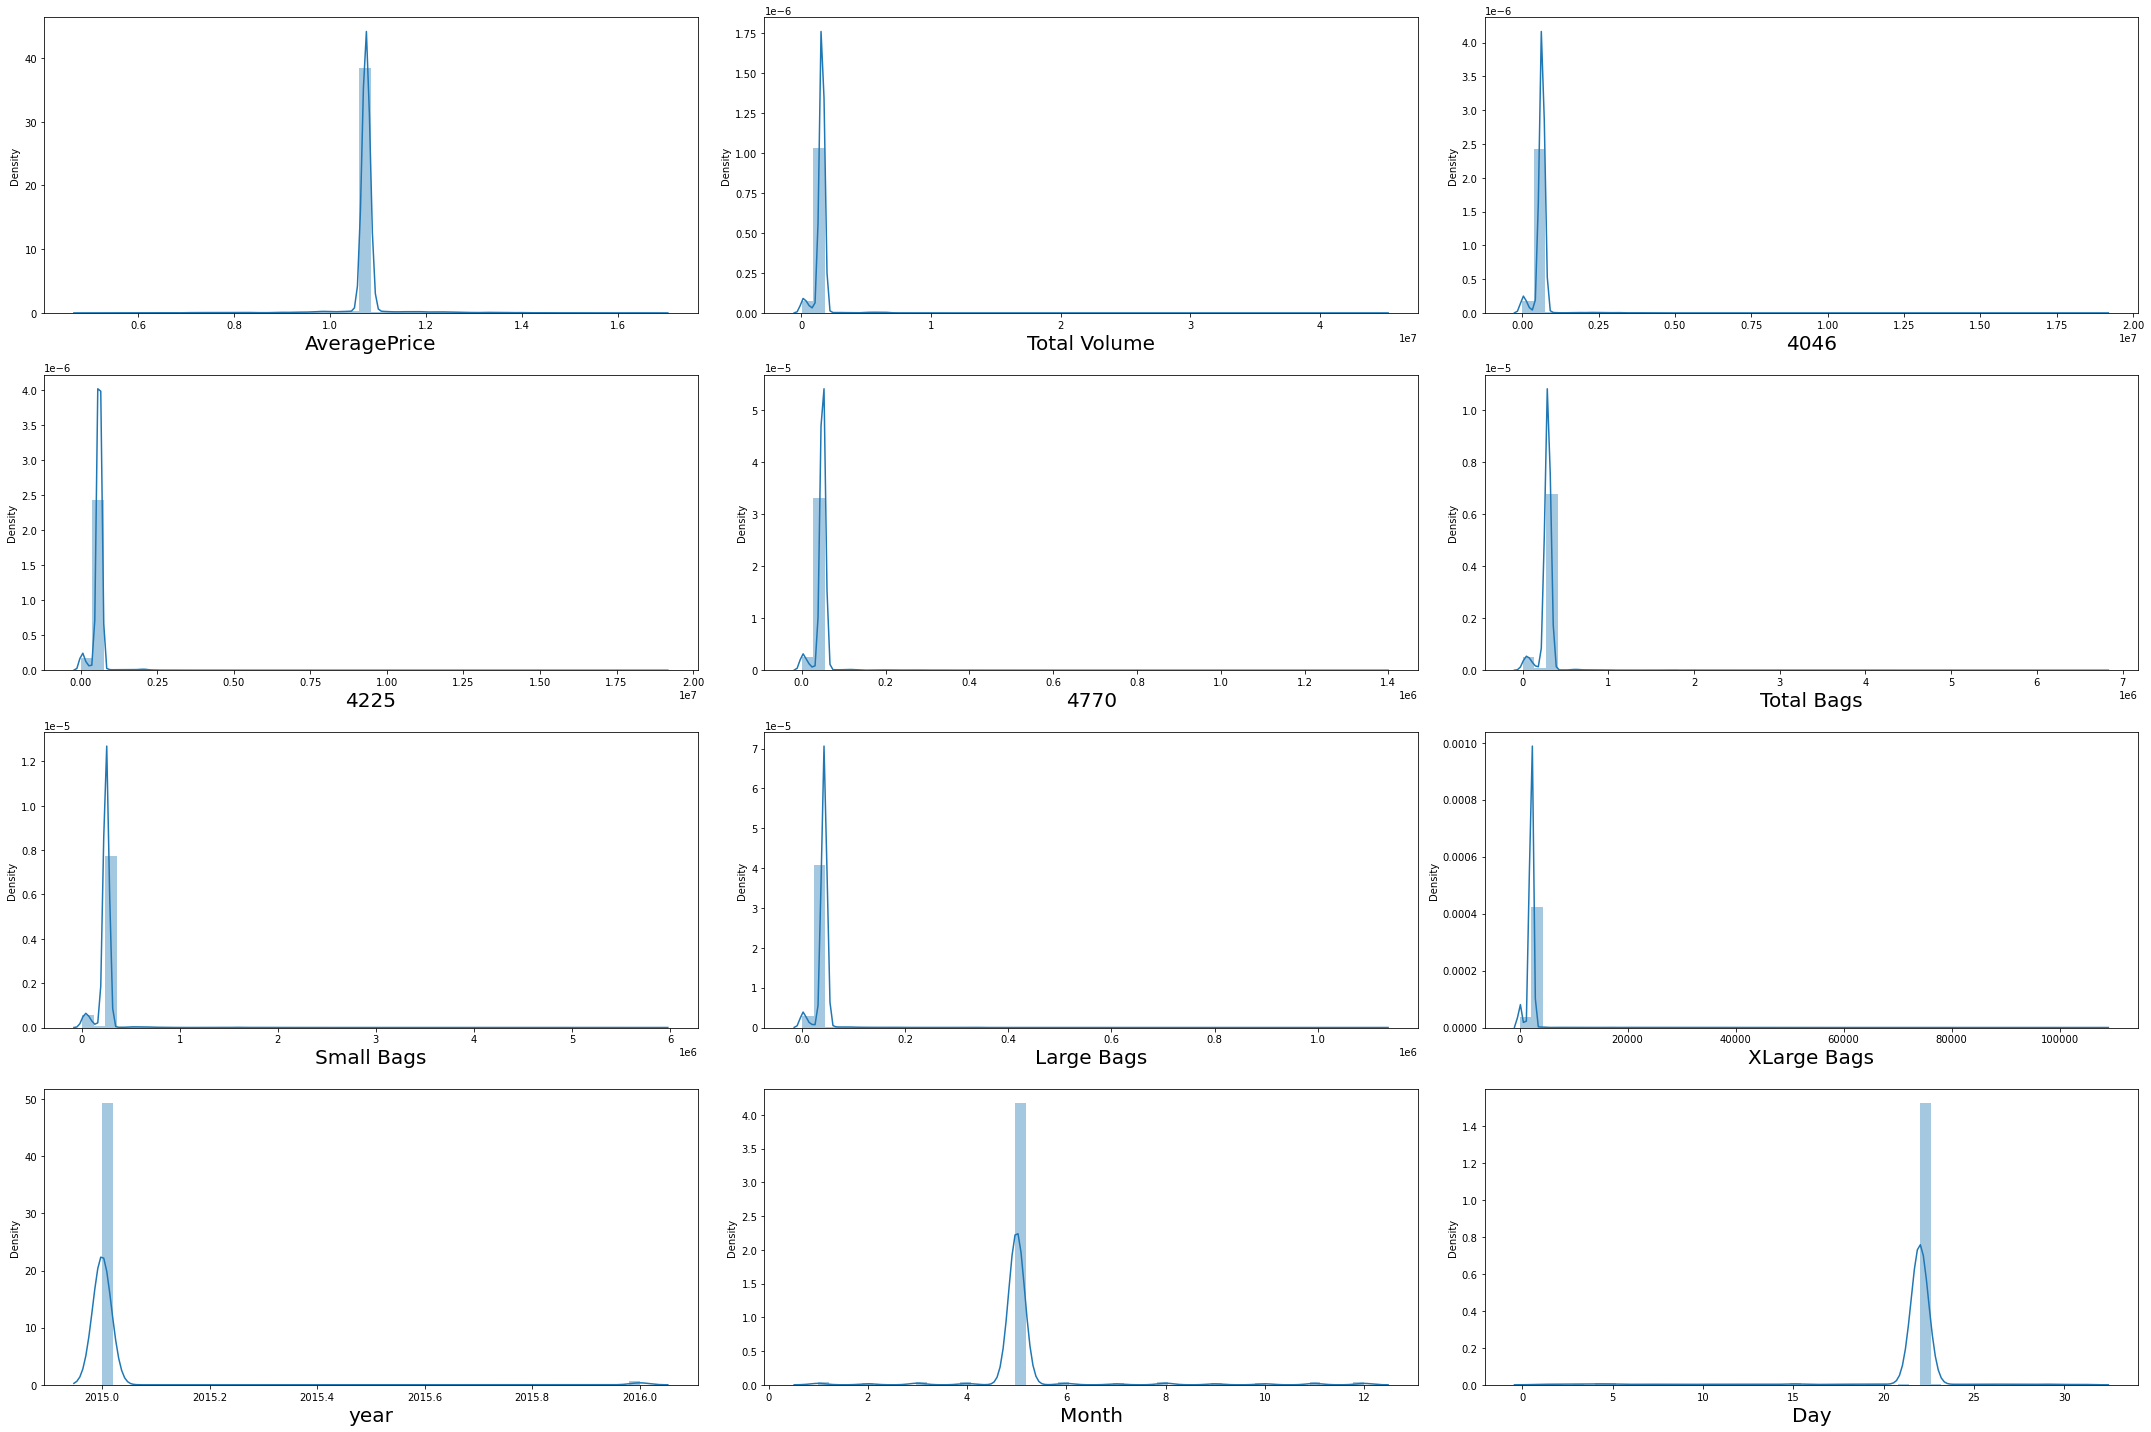

In [11]:
# check data distribution
plt.figure(figsize=(30,20))
n = 1
for col in df:
    if n<=12:
        ax = plt.subplot(4,3,n)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    n+=1
plt.tight_layout()

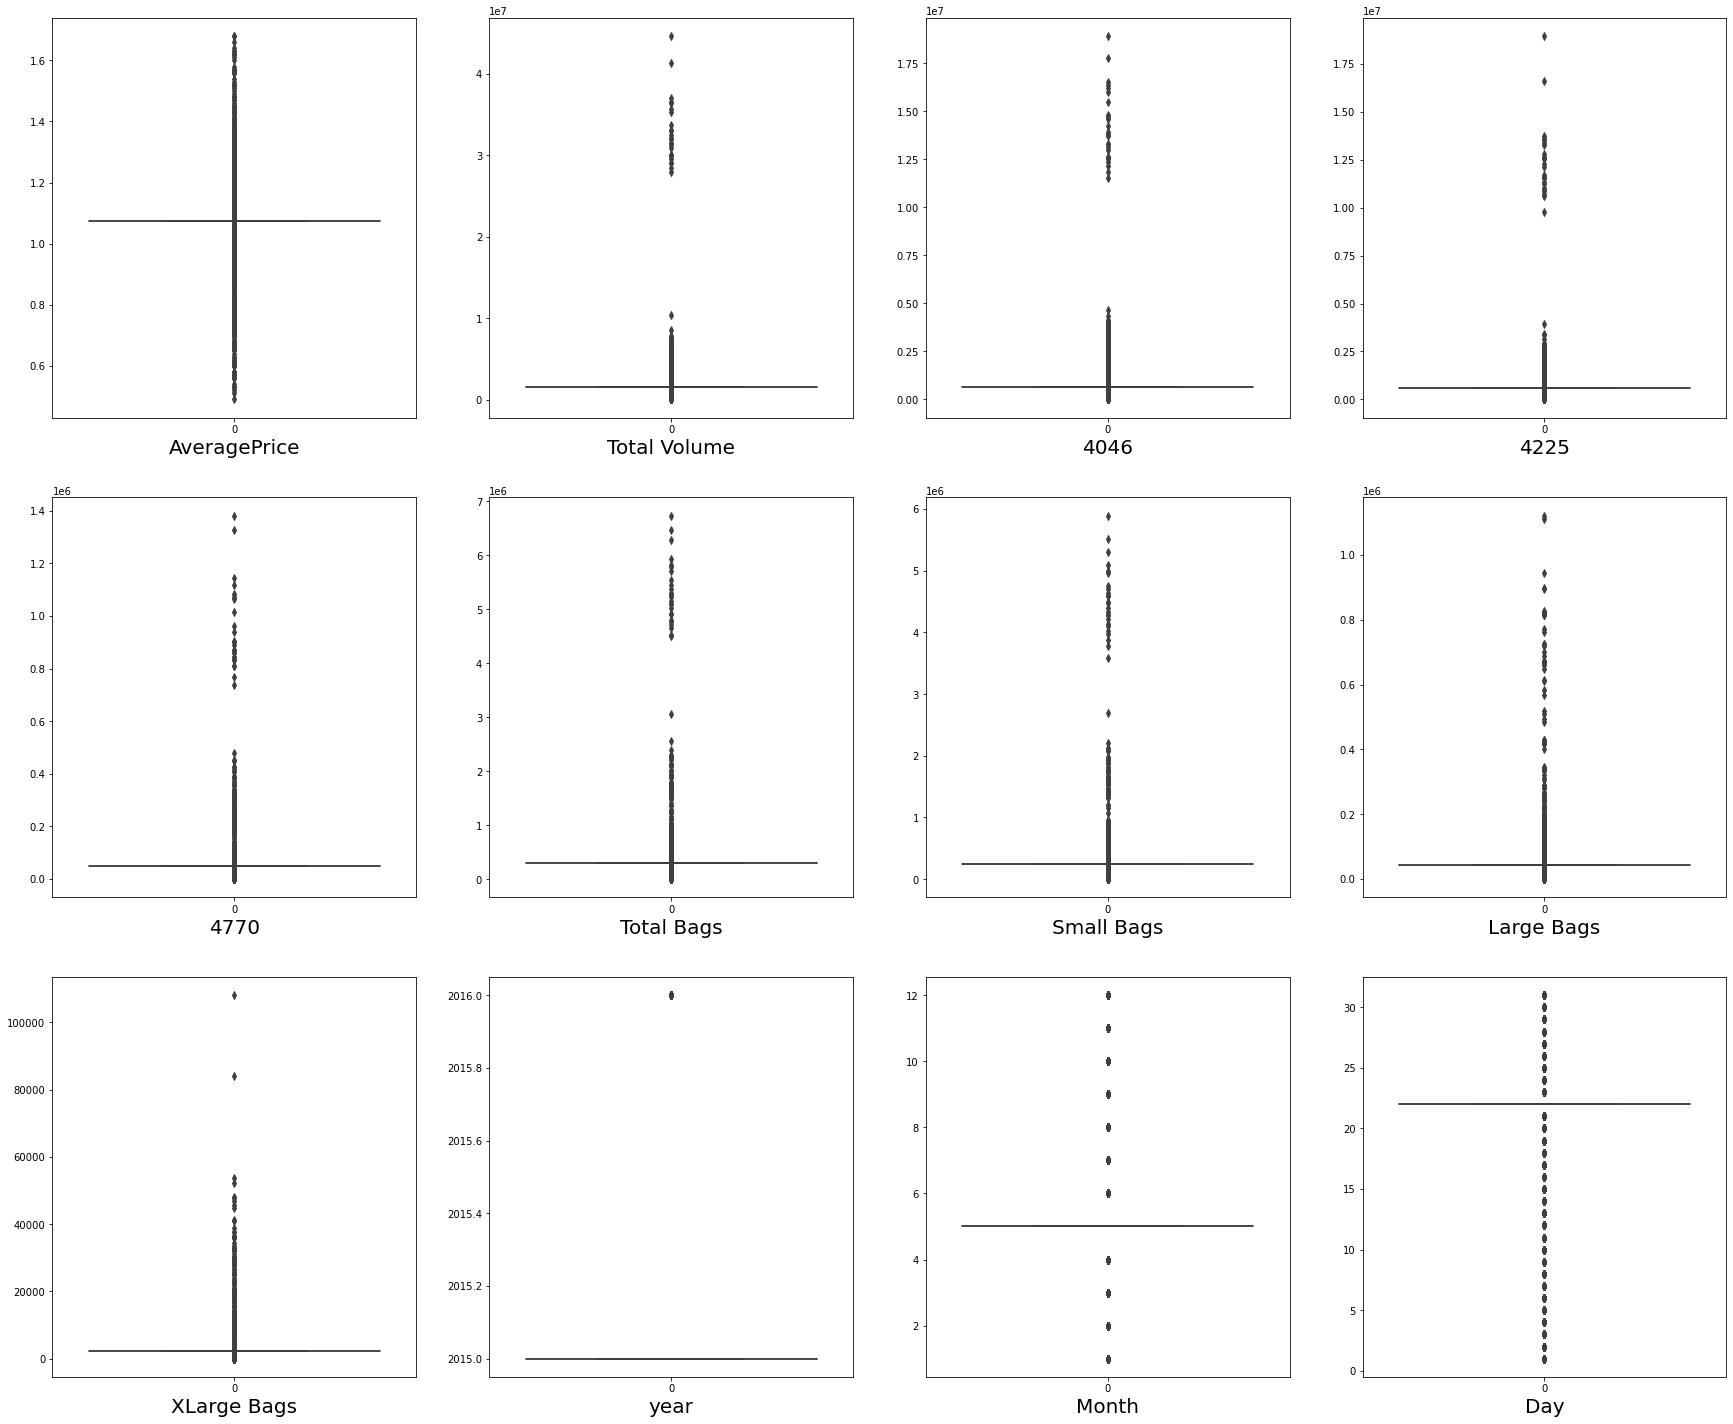

In [12]:
#Let's visualize the data using boxplot
plt.figure(figsize=(30,25))
n=1
for column in df:
    if n<=12:
        ax=plt.subplot(3,4,n)
        sns.boxplot(data=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    n+=1
plt.show()

Looks like outliers exists in almost all features except Month and Day

In [13]:
from scipy.stats import zscore
#Features having outliers
features=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']]
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
2,0.93000,1.182202e+05,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,2015.0,12.0,13.0
3,1.08000,7.899215e+04,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,2015.0,6.0,12.0
6,0.99000,8.345376e+04,1368.920000,73672.720000,93.260000,8318.860000,8196.810000,122.050000,0.000000,2015.0,11.0,15.0
7,0.98000,1.094283e+05,703.750000,101815.360000,80.000000,6829.220000,6266.850000,562.370000,0.000000,2015.0,8.0,11.0
8,1.02000,9.981142e+04,1022.150000,87315.570000,85.340000,11388.360000,11104.530000,283.830000,0.000000,2015.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16463,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.0,5.0,22.0
16464,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.0,5.0,22.0
16465,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.0,5.0,22.0
16466,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.0,5.0,22.0


In [14]:
#Checking shape of new dataset
df_new.shape

(15735, 12)

In [89]:
#Checking shape of old dataset
df.shape

(16468, 12)

In [90]:
#Checking dataloss
Dataloss = (((16468-15735)/16468)*100)
print(Dataloss)

4.451056594607724


So, I can see 4.45% dataloss in zscore method after removing outliers which is less than 10%

## * Model selection/predictions

In [38]:
X=df_new.drop('AveragePrice',axis=1)
y=df_new['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

 - Creating and Training the Model

In [39]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print('r2_score:',r2_score(lr_pred,y_test))

r2_score: -2.9204507443179155


In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

MAE: 0.003516821486923365
MSE: 0.0003351896153560017
RMSE: 0.018308184381745824


- The __RMSE is low so we can say that we do have a good model, but lets check to be more sure__.
- Lets plot the __y_test vs the predictions__

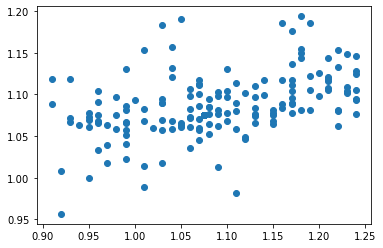

In [21]:
plt.scatter(x=y_test,y=lr_pred)

- As we can see that __we don't have a straight line so I am not sure that this is the best model we can apply on our data__

- Lets try working with the  __Decision Tree Regression model__

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)
print('r2_score:',r2_score(pred,y_test))

r2_score: -0.048607336102145515


Text(0, 0.5, 'Predicted Y')

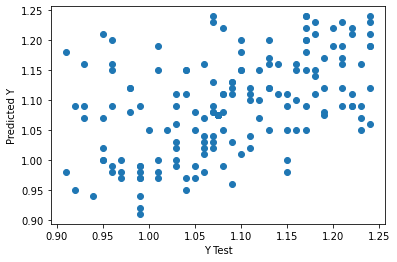

In [23]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

- Its better than the Linear regression model, and to be more sure lets check the RMSE

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0033253924017689184
MSE: 0.0003877112406492477
RMSE: 0.019690384471849395


- Very Nice, our __RMSE is lower than the previous one we got with Linear Regression__. Now I am going to try one last model to see if I can __improve my predictions for this data which is the RandomForestRegressor__

<a id=section20></a>

In [42]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)
print('r2_score:',r2_score(pred,y_test))

r2_score: -0.30696983716725


In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0025854635077366592
MSE: 0.00021774319916407627
RMSE: 0.014756124124040034


- Well as we can see the __RMSE is lower than the two previous models__, so the __RandomForest Regressor is the best model in this case.__

<a id=section21></a>

In [33]:
# save the model to disk
filename = 'Avacado_model.sav'
pickle.dump(rdr, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
result

array([1.07499011, 1.07499011, 1.07499011, ..., 1.07499011, 1.07499011,
       1.07499011])

In [34]:
pd.DataFrame([loaded_model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146
Predicted,1.07499,1.07499,1.07499,1.07499,1.118,1.07499,1.07499,1.07499,1.07499,1.07499,...,1.07499,1.07499,1.07499,1.07499,1.07499,1.07499,1.07499,1.07499,1.07499,1.07499
Original,1.07499,1.07499,1.07499,1.07499,1.180,1.07499,1.07499,1.07499,1.07499,1.07499,...,1.07499,1.07499,1.07499,1.07499,1.07499,1.07499,1.07499,1.07499,1.07499,1.07499


<a id=section22></a>